# KNN and SVM Alogrithms

### can be used only for small datasets with max 2000 datapoints


# KNN (K-Nearest-Neighbhors)--> Simplest ML Algorithm

### Better on smaller datasets, avoided for bigger datasets

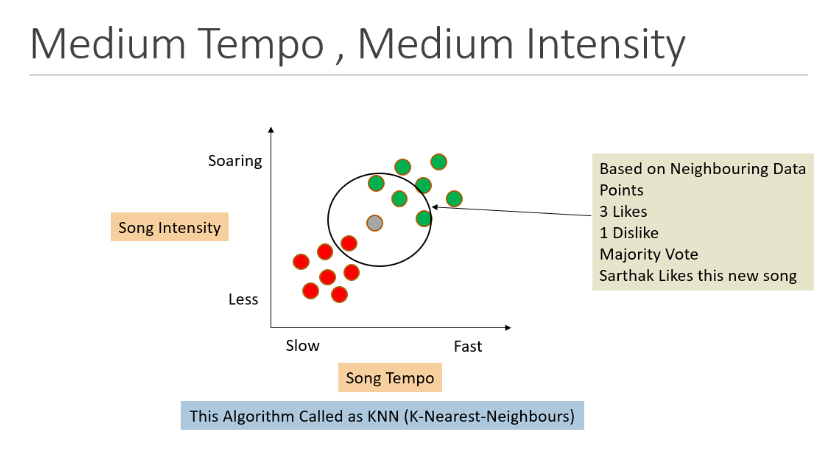

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

## Step 1: Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 2: Perfrom Basic Data Quality Checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
m = df.isna().sum()
m[m>0]

Series([], dtype: int64)

In [5]:
df.duplicated().sum()

1

## Step 3: Separate X and Y (species)

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

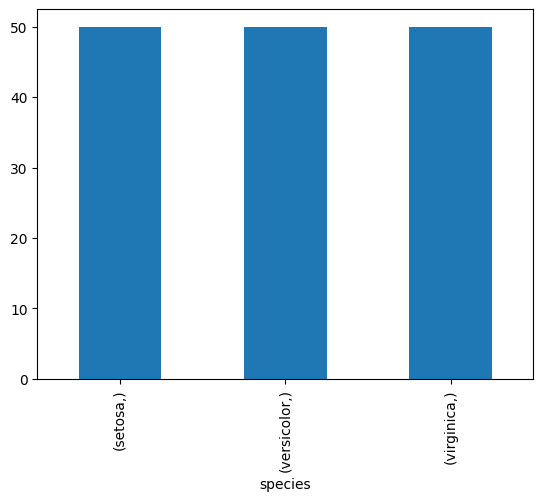

In [10]:
Y.value_counts().plot(kind='bar')

## Step 4: Perform Preprocessing on X

### there are only continuous features in X so we dont have to separate cat and con features. Only num_pipe is enough for this practise

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Step 5: Apply Train-Test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [16]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [17]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [18]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [19]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


## Step 6: Builing the Model - KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=31)
#n_neighbors is user difeine. we are taking here 31 so that the model scores are less and we practise KNN model further steps
model1.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=31)

In [21]:
model1.score(xtrain, ytrain)

0.87

In [22]:
model1.score(xtest, ytest)

0.88

## Step 7: Tuning KNN Model - Parameter Tuning using RandomizedSearchCV

In [23]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11]}

In [24]:
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
rscv_knn = RandomizedSearchCV(knn, param_distributions=params, cv=5, scoring='f1_macro')
rscv_knn.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10, 11]},
                   scoring='f1_macro')

In [25]:
rscv_knn.best_params_

{'n_neighbors': 3}

In [26]:
rscv_knn.best_score_

0.9319552669552669

In [27]:
best_knn = rscv_knn.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

## Step 8: Evalaute KNN model

In [28]:
best_knn.score(xtrain, ytrain)

0.95

In [29]:
best_knn.score(xtest, ytest)

0.98

### 8(i) Predict the results

In [30]:
ypred_train = best_knn.predict(xtrain)
ypred_test = best_knn.predict(xtest)

In [31]:
ypred_train[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [32]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [33]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [34]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


### 8(ii) Create Confusion Matrix for Test Data

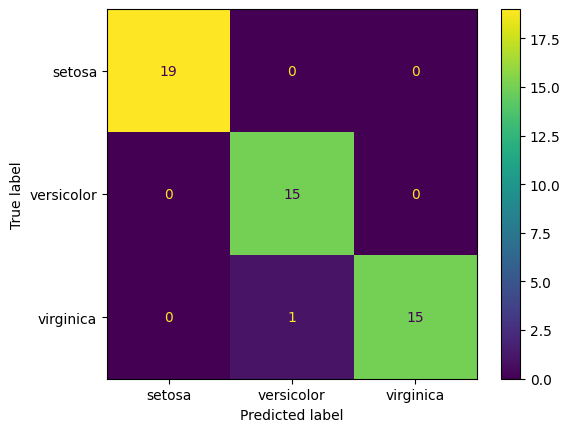

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_knn, xtest, ytest)#this directly creates Confusion Matrix

### 8(iii) Print Classification Report of test data

In [36]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# SVM Model --> Support Vector Machine

### Computationally expensive so used for smaller datasets only
### SVC --> SV Classifier ; SVR --> SV Regressor

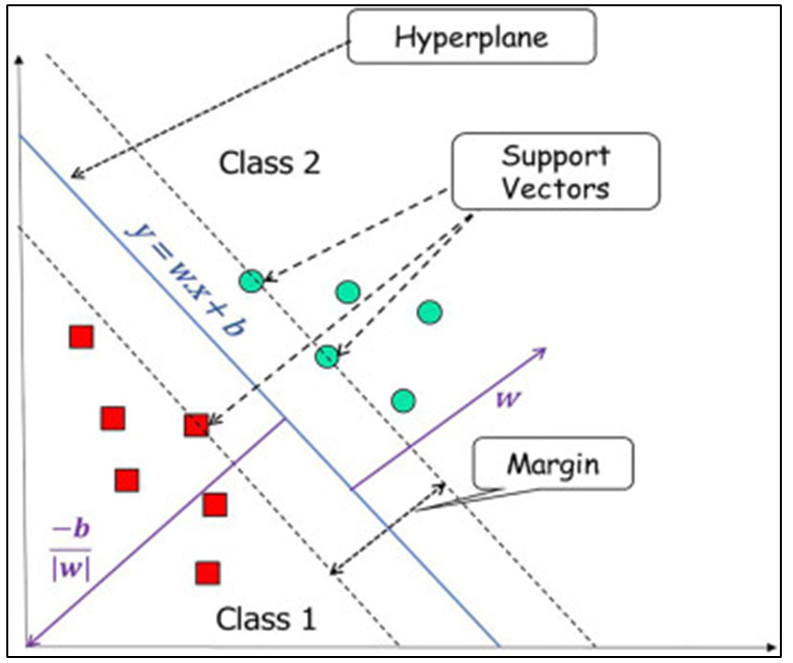

## Step 7: Model Builing --> SVM

#### Step 1 to 6 --> same as peformed in KNN

In [37]:
from sklearn.svm import SVC
model_svc = SVC(probability=True) #probablity added only in SVC model as only then it will the values
model_svc.fit(xtrain, ytrain)

SVC(probability=True)

In [38]:
model_svc.score(xtrain, ytrain)

0.97

In [39]:
model_svc.score(xtest, ytest)

0.98

## Step 8: Evaluate SVM Model using cross validation

In [41]:
from sklearn.model_selection import cross_val_score
f1_scores = cross_val_score(model_svc, xtrain, ytrain, cv=5, scoring='f1_macro')
f1_scores

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [42]:
f1_scores.mean()

0.9319552669552669

### 8(i) Predict the results

In [43]:
ypred_train2 = model_svc.predict(xtrain)
ypred_test2 = model_svc.predict(xtest)

In [44]:
ypred_test2[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [45]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


### 8(ii) Create Confusion Matrix for Test Data

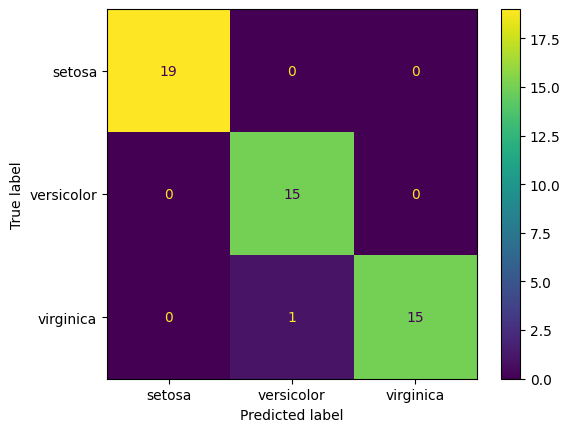

In [46]:
ConfusionMatrixDisplay.from_estimator(model_svc, xtest, ytest)

### 8(iii) Print Classification Report of test data

In [47]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## CONCLUSION : Both KNN and SVM gives good results i.e. beyond 0.8. Hence we can use any of the 2 models to predict

## Step 9: Predict Out of Sample data

In [48]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [49]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

### 9(i) apply pre.tranform on xnew

In [52]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671


### 9(ii) Predict the results along with Probability

In [53]:
preds = model_svc.predict(xnew_pre)
probs = model_svc.predict_proba(xnew_pre)

In [54]:
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [55]:
model_svc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [57]:
probs
# this gives probablty for each class in species. but we want the probabilty of predicted value only

array([[0.00806368, 0.96531772, 0.02661859],
       [0.01090255, 0.02459733, 0.96450012],
       [0.03334942, 0.94989081, 0.01675977],
       [0.62952423, 0.28604336, 0.08443241],
       [0.01286007, 0.23511778, 0.75202215],
       [0.95744478, 0.02393162, 0.0186236 ],
       [0.04751456, 0.93846163, 0.0140238 ],
       [0.00947178, 0.0465208 , 0.94400742],
       [0.96276253, 0.02116974, 0.01606773],
       [0.80813437, 0.13624502, 0.05562061],
       [0.01305384, 0.97774314, 0.00920302],
       [0.01333826, 0.97808526, 0.00857648],
       [0.01635734, 0.02362707, 0.96001559],
       [0.01802377, 0.75173951, 0.23023672],
       [0.02042012, 0.60000865, 0.37957124]])

In [58]:
import numpy as np
max_probs = np.max(probs, axis=1)

In [59]:
max_probs

array([0.96531772, 0.96450012, 0.94989081, 0.62952423, 0.75202215,
       0.95744478, 0.93846163, 0.94400742, 0.96276253, 0.80813437,
       0.97774314, 0.97808526, 0.96001559, 0.75173951, 0.60000865])

## Step 10: Save above results in xnew

In [60]:
xnew['species_pred'] = preds
xnew['prob'] = max_probs

In [61]:
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width,species_pred,prob
0,5.5,2.5,4.0,1.3,versicolor,0.965318
1,6.9,3.1,5.1,2.3,virginica,0.964500
2,5.1,2.5,3.0,1.1,versicolor,0.949891
3,4.4,2.9,NaN,0.2,setosa,0.629524
4,5.9,3.0,5.1,1.8,virginica,0.752022


## Step 11: Save above df (xnew) to csv

In [62]:
xnew.to_csv('SVCResults.csv', index=False)

## Step 12: Push the files to github

### SAVE files before pushing

1. git add .
2. git commit -m "Class 22 - 23.03 - KNN and SVM Algorithms"
3. git push -u origin main